# Линейная регрессия
__Суммарное количество баллов: 10__

__Решение отправлять на `ml.course.practice@gmail.com`__

__Тема письма: `[ML][MS][HW09] <ФИ>`, где вместо `<ФИ>` указаны фамилия и имя__

In [6]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy

In [96]:
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15., 6.]

In [2]:
def read_data(path="boston.csv"):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=15)
    X = dataframe[:, :-1]
    y = dataframe[:, -1]
    return X, y

In [3]:
def generate_synthetic(size, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

### Задание 1 (1 балл)
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика MSE. Ее и нужно реализовать.

In [4]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

### Задание 2 (3 балла)
Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [234]:
class NormalLR:
#     def __init__(self):
#         pass
    
    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0],1)), X))
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    
    def predict(self, X):
        return X.dot(self.w[1:]) + self.w[0]

In [240]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [241]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.00974066752085915


### Задание 3 (2 балла)
Теперь реализуем линейную регрессию с использованием градиентного спуска с larning rate `alpha` в течении `iterations` итераций.

#### Методы
`fit(X, y)` - приближает решение задачи минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$ при помощи градиентного спуска. 


`predict(X)` - строит предсказание `y` для объектов из `X`.

### Задание 4 (2 балла)
Добавьте в метод `fit` регуляризацию Лассо с коэффициентом `l`. Постройте график зависимости ошибки предсказания данных из синтетического набора данных от коэффициента регуляризации

In [262]:
class GradientLR:
    def __init__(self, alpha, iterations=10000, l=0.):
        self.alpha = alpha
        self.iterations = iterations
        self.l = l
    
    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0],1)), X))
        self.w = np.random.rand(X.shape[1])
        for _ in range(self.iterations):
            lasso = self.l * (regr.w > 0) - self.l * (regr.w < 0)
#             grad = 2 * X.T.dot(X.dot(self.w) - y) + lasso
            grad = 2 * (X.T.dot(X.dot(self.w) - y) + self.l * self.w)


            self.grad = grad
            self.w -= self.alpha * grad

    def predict(self, X):
        return X.dot(self.w[1:]) + self.w[0]

In [270]:
def build_plot(X_train, y_train, X_test, y_test, tot=100, alpha=1e-7, iterations=1000):
    l = np.linspace(1e4, 1e6, tot)
    mses = np.zeros(tot)
    for i in range(tot):
        regr = GradientLR(alpha, iterations, l[i])
        regr.fit(X_train, y_train)
        mses[i] = mse(y_test, regr.predict(X_test))
        if mses[i] != mses[i]:
            mses[i] = 100
        if mses[i] == np.inf:
            mses[i] = 100
    plt.xlabel("l")
    plt.ylabel("mse")
    plt.plot(l, mses)

In [243]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [249]:
regr = GradientLR(1e-3, iterations=1000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.010373326336948655


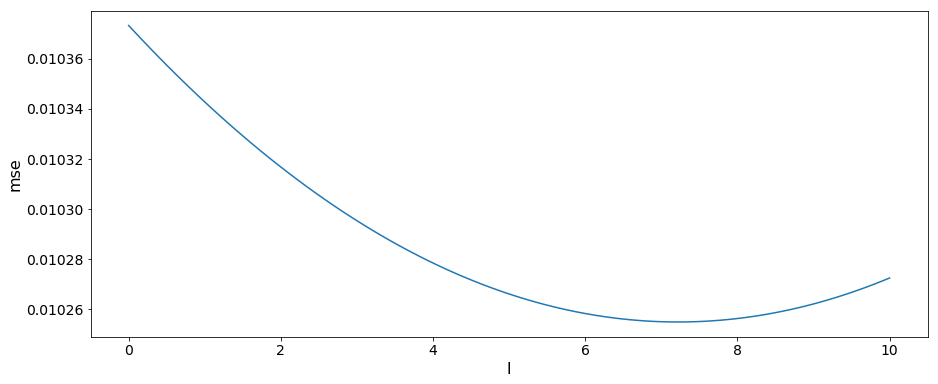

In [250]:
build_plot(X_train, y_train, X_test, y_test, alpha=1e-3)

### Задание 5 (2 балла)
Протесируйте оба метода на данных `boston.csv`, для градиентного спуска постройте график зависимости ошибки от коэффициента регуляризации. 

In [251]:
X, y = read_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

In [264]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

32799862.68020344


In [269]:
regr = GradientLR(1e-10, iterations=1000, l=1e4 )
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

59825511.27595442


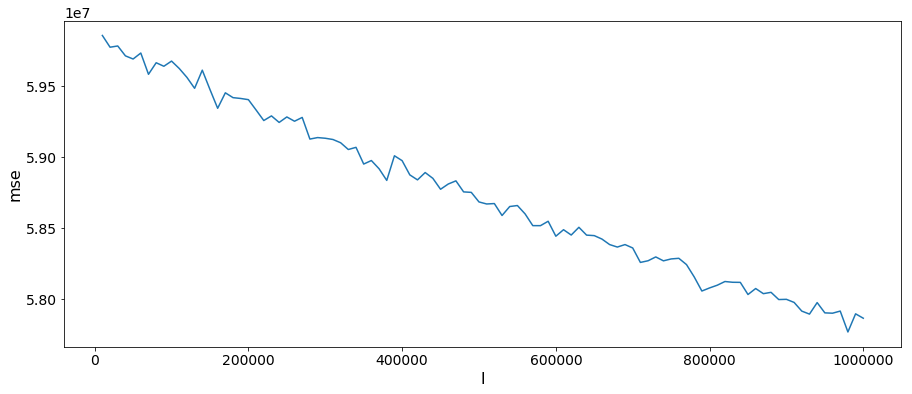

In [271]:
build_plot(X_train, y_train, X_test, y_test, alpha=1e-10, iterations=1000)